In [1]:
!pip install category_encoders

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor  
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import accuracy_score




%matplotlib inline

In [3]:
!pip install category_encoders

In [4]:
data = pd.read_csv(r"C:\Users\gopal\Documents\major3\old_powerconsumption_New_data (1).csv")
data.head()

,Temperature,Humidity,Voltage,Current,Power
0,35.013286,1.620603,119.055519,3.030663,360.817191
1,25.908730,57.847918,48.723414,4.386690,213.734504
2,10.460330,64.609784,118.066455,2.184007,257.857940
3,19.179683,36.108564,28.903095,1.955580,56.522317
4,35.234379,14.920370,106.262071,2.360396,250.820597


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6430 entries, 0 to 6429
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  6430 non-null   float64
 1   Humidity     6430 non-null   float64
 2   Voltage      6430 non-null   float64
 3   Current      6430 non-null   float64
 4   Power        6430 non-null   float64
dtypes: float64(5)
memory usage: 251.3 KB
None


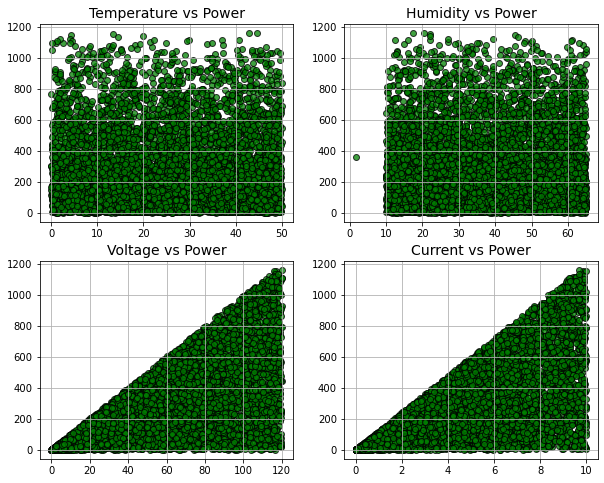

In [6]:
fig,ax = plt.subplots(2,2,figsize=(10,8))
ax = ax.ravel()
for i in range(4):
  ax[i].scatter(data[data.columns[i]],data['Power'],edgecolor='k',color='green',alpha=0.75)
  ax[i].set_title(f"{data.columns[i]} vs Power",fontsize=14)
  ax[i].grid(True)
plt.show()

In [7]:
data.select_dtypes(include=['object']).head()

""
0
1
2
3
4


In [8]:
data_objects = data.select_dtypes(include=['object']).copy()
datas = data.select_dtypes(exclude=['object']).copy()
data_objects.head()

""
0
1
2
3
4


In [9]:
datas = datas.drop(['Power'],axis=1)
datas.isnull().sum()

Temperature    0
Humidity       0
Voltage        0
Current        0
dtype: int64

In [10]:
#drop the data in similar data
X=datas.drop(['Voltage','Current'],axis=1)



#drop Particular (Voltage and Current) column
u=datas['Voltage']
v=datas['Current'] 
print(u)
print(v)

0       119.055519
1        48.723414
2       118.066455
3        28.903095
4       106.262071
           ...    
6425      2.444523
6426    113.667354
6427     44.613427
6428     93.847874
6429     55.696259
Name: Voltage, Length: 6430, dtype: float64
0       3.030663
1       4.386690
2       2.184007
3       1.955580
4       2.360396
          ...   
6425    9.460972
6426    4.692144
6427    7.462123
6428    3.571433
6429    9.425221
Name: Current, Length: 6430, dtype: float64


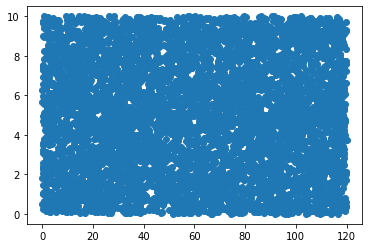

In [11]:
plt.scatter(u,v)
plt.show()

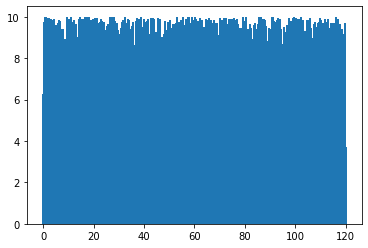

In [12]:
plt.bar(u,v)
plt.show()

##  Support Vector Machine for Polynomial Regression

In [13]:
#data will be train the Radial basis function (RBF) kernel: and Polynomial kernel and Sigmoid kernel: 
clf1 = SVR(kernel='poly',degree=3, C=1.0, epsilon=0.1)
clf2 = SVR(kernel='poly',degree=3, C=1.0, epsilon=0.1)


In [14]:
#data fit 'Temperature','Humidity' vs 'Voltage'  
clf1.fit(X, u)


 #data fit 'Temperature','Humidity' vs 'Current'
clf2.fit(X,v)



SVR(kernel='poly')

In [16]:
pow=0

while(pow!=1):
  #Input data
  lati=input("Enter the Temperature: ")
  longi=input("Enter the Humidity: ")

  #testing the New data 
  test=np.array([lati,longi])
  data = pd.DataFrame(test.reshape(-1,len(test)),columns=('Temperature','Humidity'))

  #predict the data using clf1
  volt= clf1.predict(data)

  #predict the data using clf2
  curr= clf2.predict(data)




  #display the Voltage and current
  print("Voltage:",volt)
  print("current:",curr)



  #the power will be display on the given voltage and current values
  power=volt*curr
  if power<=1000:
    print("Power:",power)
    pow=1
  else:
    pow=0


  

Enter the Temperature: 25.90873032
Enter the Humidity: 57.8479175
Voltage: [57.52019158]
current: [4.88653455]
Power: [281.07440331]
